In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E:\\excels\\seasonality.csv")

In [3]:
data.columns

Index(['site_code', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'datetime', 'time_decimal', 'air_sample_container_id', 'value',
       'value_unc', 'latitude', 'longitude', 'altitude', 'elevation',
       'intake_height', 'method', 'event_number', 'instrument',
       'analysis_datetime', 'qcflag'],
      dtype='object')

In [4]:
data.dtypes

site_code                   object
year                         int64
month                        int64
day                          int64
hour                         int64
minute                       int64
second                       int64
datetime                    object
time_decimal               float64
air_sample_container_id     object
value                      float64
value_unc                  float64
latitude                   float64
longitude                  float64
altitude                     int64
elevation                    int64
intake_height                int64
method                      object
event_number                 int64
instrument                  object
analysis_datetime           object
qcflag                      object
dtype: object

In [5]:
data['datetime']=pd.to_datetime(data['datetime'])

In [6]:
data

,site_code,year,month,day,hour,minute,second,datetime,time_decimal,air_sample_container_id,...,latitude,longitude,altitude,elevation,intake_height,method,event_number,instrument,analysis_datetime,qcflag
0,MLO,1969,8,20,17,55,0,1969-08-20 17:55:00+00:00,1969.634922,33-69,...,19.5300,-155.5800,3399,3397,2,N,78808,LR1,1969-09-09T09:02:00,..L
1,MLO,1969,8,20,17,55,0,1969-08-20 17:55:00+00:00,1969.634922,34-69,...,19.5300,-155.5800,3399,3397,2,N,78809,LR1,1969-09-09T09:12:00,+..
2,MLO,1969,8,20,18,30,0,1969-08-20 18:30:00+00:00,1969.634989,31-69,...,19.5300,-155.5800,3399,3397,2,N,78810,LR1,1969-09-09T08:58:00,*..
3,MLO,1969,8,20,18,30,0,1969-08-20 18:30:00+00:00,1969.634989,32-69,...,19.5300,-155.5800,3399,3397,2,N,78811,LR1,1969-09-09T09:00:00,*..
4,MLO,1969,8,27,19,15,0,1969-08-27 19:15:00+00:00,1969.654252,35-69,...,19.5300,-155.5800,3399,3397,2,N,78812,LR1,1969-09-09T08:42:00,*..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,MLO,2021,12,21,19,54,0,2021-12-21 19:54:00+00:00,2021.972135,5412-99,...,19.5362,-155.5763,3402,3397,5,P,498794,PC2,2022-01-21T11:45:46,...
10333,MLO,2021,12,28,19,56,0,2021-12-28 19:56:00+00:00,2021.991317,2862-99,...,19.5362,-155.5763,3437,3397,40,S,498804,PC2,2022-01-24T13:15:03,...
10334,MLO,2021,12,28,19,56,0,2021-12-28 19:56:00+00:00,2021.991317,4657-99,...,19.5362,-155.5763,3437,3397,40,S,498803,PC2,2022-01-24T13:29:19,...
10335,MLO,2021,12,28,20,15,0,2021-12-28 20:15:00+00:00,2021.991353,1947-99,...,19.5362,-155.5763,3402,3397,5,P,498805,PC2,2022-01-24T16:06:34,...


In [7]:
data.set_index('datetime',inplace=True)

In [8]:
data=data[['year','month','day','value']]

In [9]:
data

,year,month,day,value
datetime,,,,
1969-08-20 17:55:00+00:00,1969,8,20,323.17
1969-08-20 17:55:00+00:00,1969,8,20,324.72
1969-08-20 18:30:00+00:00,1969,8,20,331.02
1969-08-20 18:30:00+00:00,1969,8,20,-999.99
1969-08-27 19:15:00+00:00,1969,8,27,-999.99
...,...,...,...,...
2021-12-21 19:54:00+00:00,2021,12,21,417.19
2021-12-28 19:56:00+00:00,2021,12,28,417.97
2021-12-28 19:56:00+00:00,2021,12,28,417.97


In [10]:
#values with -999.99 is invalid data
data=data[data['value']>=0]
data

,year,month,day,value
datetime,,,,
1969-08-20 17:55:00+00:00,1969,8,20,323.17
1969-08-20 17:55:00+00:00,1969,8,20,324.72
1969-08-20 18:30:00+00:00,1969,8,20,331.02
1969-08-27 19:15:00+00:00,1969,8,27,326.28
1969-08-27 19:50:00+00:00,1969,8,27,322.87
...,...,...,...,...
2021-12-21 19:54:00+00:00,2021,12,21,417.19
2021-12-28 19:56:00+00:00,2021,12,28,417.97
2021-12-28 19:56:00+00:00,2021,12,28,417.97


In [11]:
table=data.groupby('year').count()

In [12]:
table

,month,day,value
year,,,
1969,35,35,35
1970,81,81,81
1971,24,24,24
1974,7,7,7
1976,54,54,54
1977,94,94,94
1978,97,97,97
1979,107,107,107
1980,196,196,196


In [13]:
table.month.mean()

205.62

In [14]:
data=data[data.year>=1990]

In [15]:
data

,year,month,day,value
datetime,,,,
1990-01-05 19:36:00+00:00,1990,1,5,354.55
1990-01-05 19:36:00+00:00,1990,1,5,354.68
1990-01-05 19:43:00+00:00,1990,1,5,354.74
1990-01-05 19:43:00+00:00,1990,1,5,354.84
1990-01-05 19:56:00+00:00,1990,1,5,354.66
...,...,...,...,...
2021-12-21 19:54:00+00:00,2021,12,21,417.19
2021-12-28 19:56:00+00:00,2021,12,28,417.97
2021-12-28 19:56:00+00:00,2021,12,28,417.97


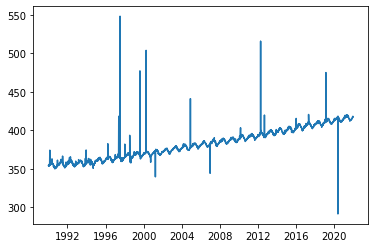

In [16]:
plt.plot(data.value)

In [17]:
from scipy import stats

In [18]:
grouped_data=data.groupby('year')

In [19]:
years=grouped_data.groups.keys()

In [20]:
iqr=dict()
q3=dict()
q1=dict()
for i in years:
    iqr[i]=(stats.iqr(grouped_data.get_group(i).value))
    q3[i]=(np.quantile(grouped_data.get_group(i).value,0.75))
    q1[i]=(np.quantile(grouped_data.get_group(i).value,0.25))

In [21]:
cover=data[['value','year']].apply(lambda x:False 
                             if (x.value>iqr[x.year]*1.5+q3[x.year] or x.value<q1[x.year]-iqr[x.year]*1.5) else True , axis=1)

In [22]:
data['not outlier']=cover.values

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_8348/1434961847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['not outlier']=cover.values


In [23]:
data=data[data['not outlier']==True]

In [24]:
data.drop(columns='not outlier',inplace=True)

C:\Users\python\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
data

,year,month,day,value
datetime,,,,
1990-01-05 19:36:00+00:00,1990,1,5,354.55
1990-01-05 19:36:00+00:00,1990,1,5,354.68
1990-01-05 19:43:00+00:00,1990,1,5,354.74
1990-01-05 19:43:00+00:00,1990,1,5,354.84
1990-01-05 19:56:00+00:00,1990,1,5,354.66
...,...,...,...,...
2021-12-21 19:54:00+00:00,2021,12,21,417.19
2021-12-28 19:56:00+00:00,2021,12,28,417.97
2021-12-28 19:56:00+00:00,2021,12,28,417.97


<AxesSubplot:xlabel='datetime'>

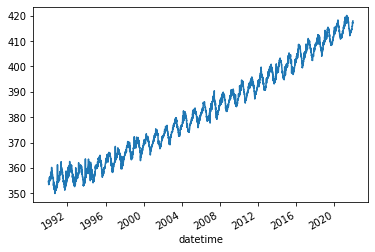

In [26]:
data.value.plot()

In [27]:
df=data.resample('D').mean()

In [28]:
df

,year,month,day,value
datetime,,,,
1990-01-05 00:00:00+00:00,1990.0,1.0,5.0,354.726667
1990-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN
1990-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN
1990-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN
1990-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-24 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-12-25 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-12-26 00:00:00+00:00,NaN,NaN,NaN,NaN


In [29]:
df=df.interpolate(method='time')

In [30]:
df

,year,month,day,value
datetime,,,,
1990-01-05 00:00:00+00:00,1990.0,1.0,5.0,354.726667
1990-01-06 00:00:00+00:00,1990.0,1.0,6.0,354.553214
1990-01-07 00:00:00+00:00,1990.0,1.0,7.0,354.379762
1990-01-08 00:00:00+00:00,1990.0,1.0,8.0,354.206310
1990-01-09 00:00:00+00:00,1990.0,1.0,9.0,354.032857
...,...,...,...,...
2021-12-24 00:00:00+00:00,2021.0,12.0,24.0,417.540357
2021-12-25 00:00:00+00:00,2021.0,12.0,25.0,417.647143
2021-12-26 00:00:00+00:00,2021.0,12.0,26.0,417.753929


In [31]:
df.drop(columns=['year','month','day'],inplace=True)

In [32]:
df.to_csv('preprocessed.csv')

### preprocessing over ###

In [33]:
df=pd.read_csv("preprocessed.csv",parse_dates=True,index_col=0)

In [34]:
df

,value
datetime,
1990-01-05 00:00:00+00:00,354.726667
1990-01-06 00:00:00+00:00,354.553214
1990-01-07 00:00:00+00:00,354.379762
1990-01-08 00:00:00+00:00,354.206310
1990-01-09 00:00:00+00:00,354.032857
...,...
2021-12-24 00:00:00+00:00,417.540357
2021-12-25 00:00:00+00:00,417.647143
2021-12-26 00:00:00+00:00,417.753929


In [35]:
dfshifted = pd.concat([df.shift(365),df.shift(30),df.shift(7),df.shift(1),df],axis=1)
dfshifted.columns=['Shift365','Shift30','Shift7','Shift1','Value']
dfshifted

,Shift365,Shift30,Shift7,Shift1,Value
datetime,,,,,
1990-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,354.726667
1990-01-06 00:00:00+00:00,NaN,NaN,NaN,354.726667,354.553214
1990-01-07 00:00:00+00:00,NaN,NaN,NaN,354.553214,354.379762
1990-01-08 00:00:00+00:00,NaN,NaN,NaN,354.379762,354.206310
1990-01-09 00:00:00+00:00,NaN,NaN,NaN,354.206310,354.032857
...,...,...,...,...,...
2021-12-24 00:00:00+00:00,414.493889,415.369643,417.267143,417.433571,417.540357
2021-12-25 00:00:00+00:00,414.640833,415.456786,417.255357,417.540357,417.647143
2021-12-26 00:00:00+00:00,414.787778,415.543929,417.243571,417.647143,417.753929


In [36]:
temp = pd.concat([dfshifted['Value']-dfshifted['Shift365'],dfshifted['Value']-dfshifted['Shift30'],
    dfshifted['Value']-dfshifted['Shift7'],dfshifted['Value']-dfshifted['Shift1']],axis=1)
temp.columns=['t-365','t-30','t-7','t-1']

dfshifted=pd.concat([dfshifted,temp],axis=1)
dfshifted

,Shift365,Shift30,Shift7,Shift1,Value,t-365,t-30,t-7,t-1
datetime,,,,,,,,,
1990-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,354.726667,NaN,NaN,NaN,NaN
1990-01-06 00:00:00+00:00,NaN,NaN,NaN,354.726667,354.553214,NaN,NaN,NaN,-0.173452
1990-01-07 00:00:00+00:00,NaN,NaN,NaN,354.553214,354.379762,NaN,NaN,NaN,-0.173452
1990-01-08 00:00:00+00:00,NaN,NaN,NaN,354.379762,354.206310,NaN,NaN,NaN,-0.173452
1990-01-09 00:00:00+00:00,NaN,NaN,NaN,354.206310,354.032857,NaN,NaN,NaN,-0.173452
...,...,...,...,...,...,...,...,...,...
2021-12-24 00:00:00+00:00,414.493889,415.369643,417.267143,417.433571,417.540357,3.046468,2.170714,0.273214,0.106786
2021-12-25 00:00:00+00:00,414.640833,415.456786,417.255357,417.540357,417.647143,3.006310,2.190357,0.391786,0.106786
2021-12-26 00:00:00+00:00,414.787778,415.543929,417.243571,417.647143,417.753929,2.966151,2.210000,0.510357,0.106786


Text(0, 0.5, 'Differene')

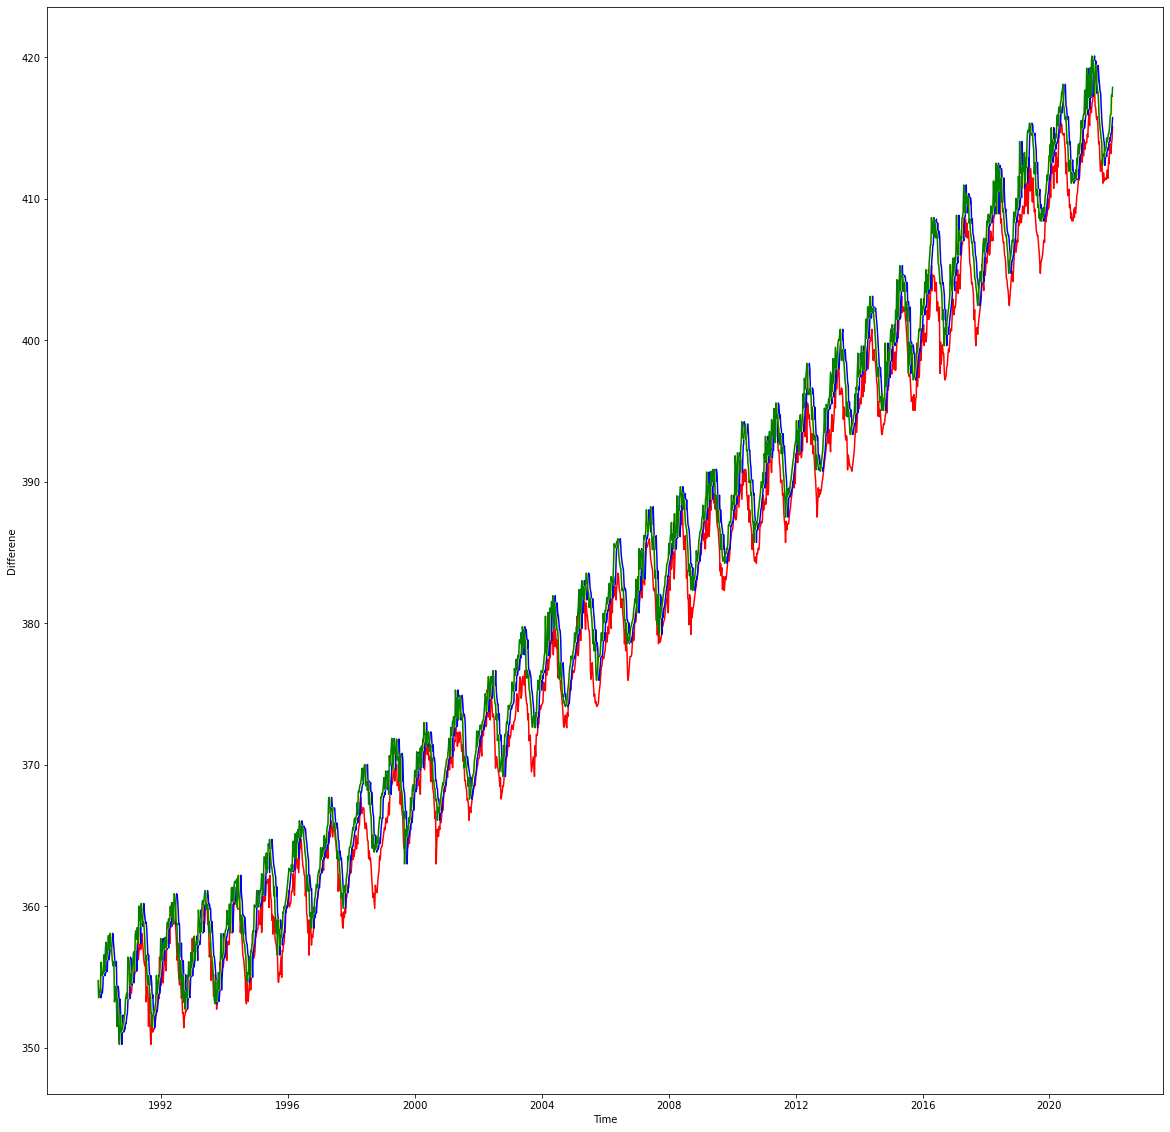

In [37]:
plt.figure(figsize=(20,20))
plt.plot(dfshifted['Shift365'],color='red')
plt.plot(dfshifted['Shift30'],color='blue')
plt.plot(dfshifted['Shift7'],color='yellow')
plt.plot(dfshifted['Shift1'],color='green')
plt.xlabel('Time')
plt.ylabel('Differene')


Text(0, 0.5, 'Differene')

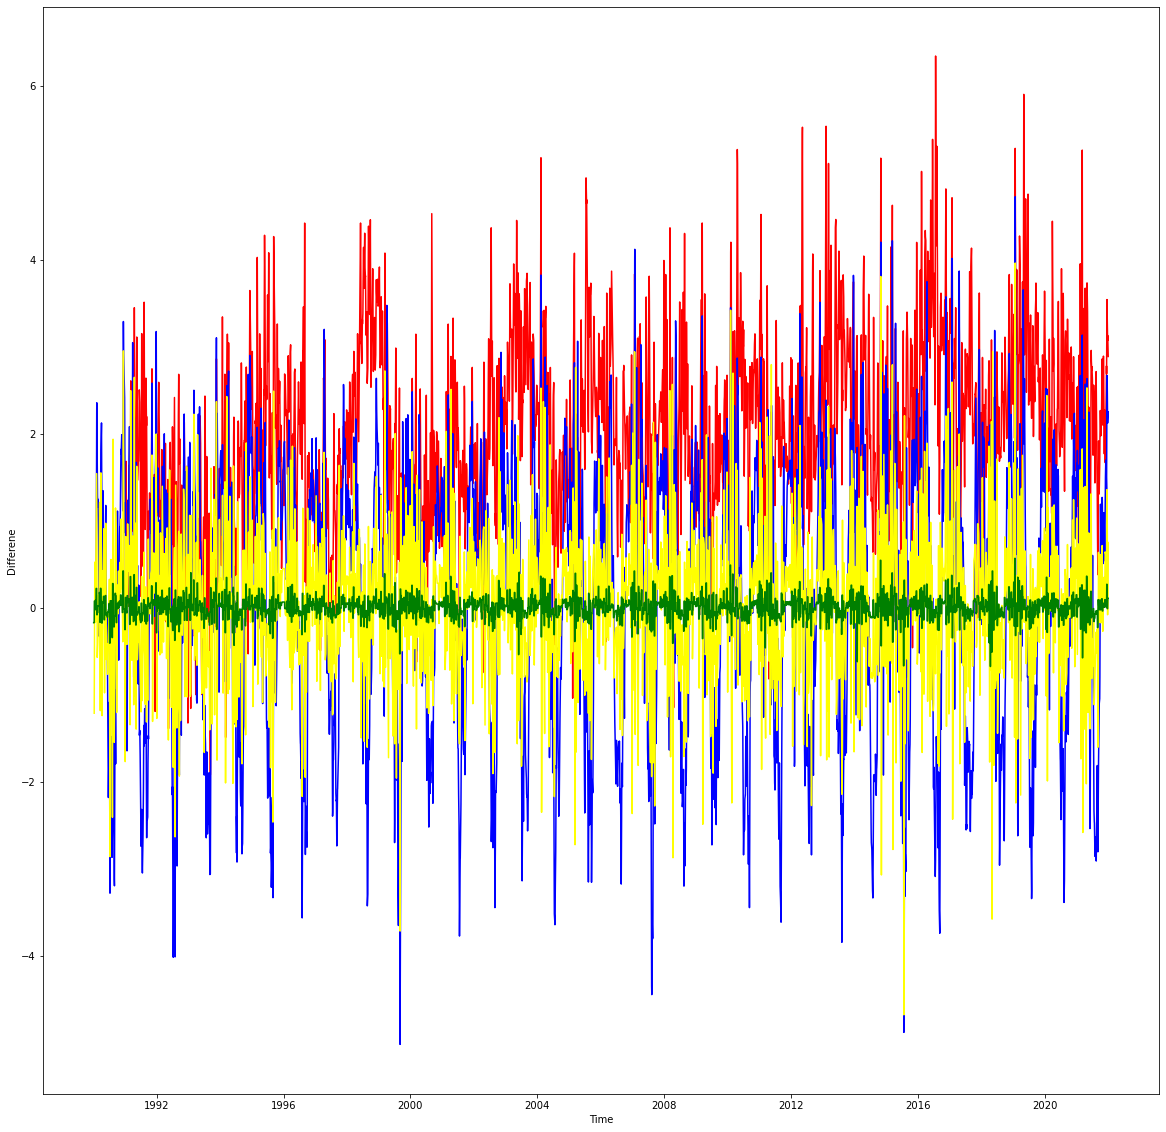

In [38]:
plt.figure(figsize=(20,20))
plt.plot(dfshifted['t-365'],color='red')
plt.plot(dfshifted['t-30'],color='blue')
plt.plot(dfshifted['t-7'],color='yellow')
plt.plot(dfshifted['t-1'],color='green')
plt.xlabel('Time')
plt.ylabel('Differene')


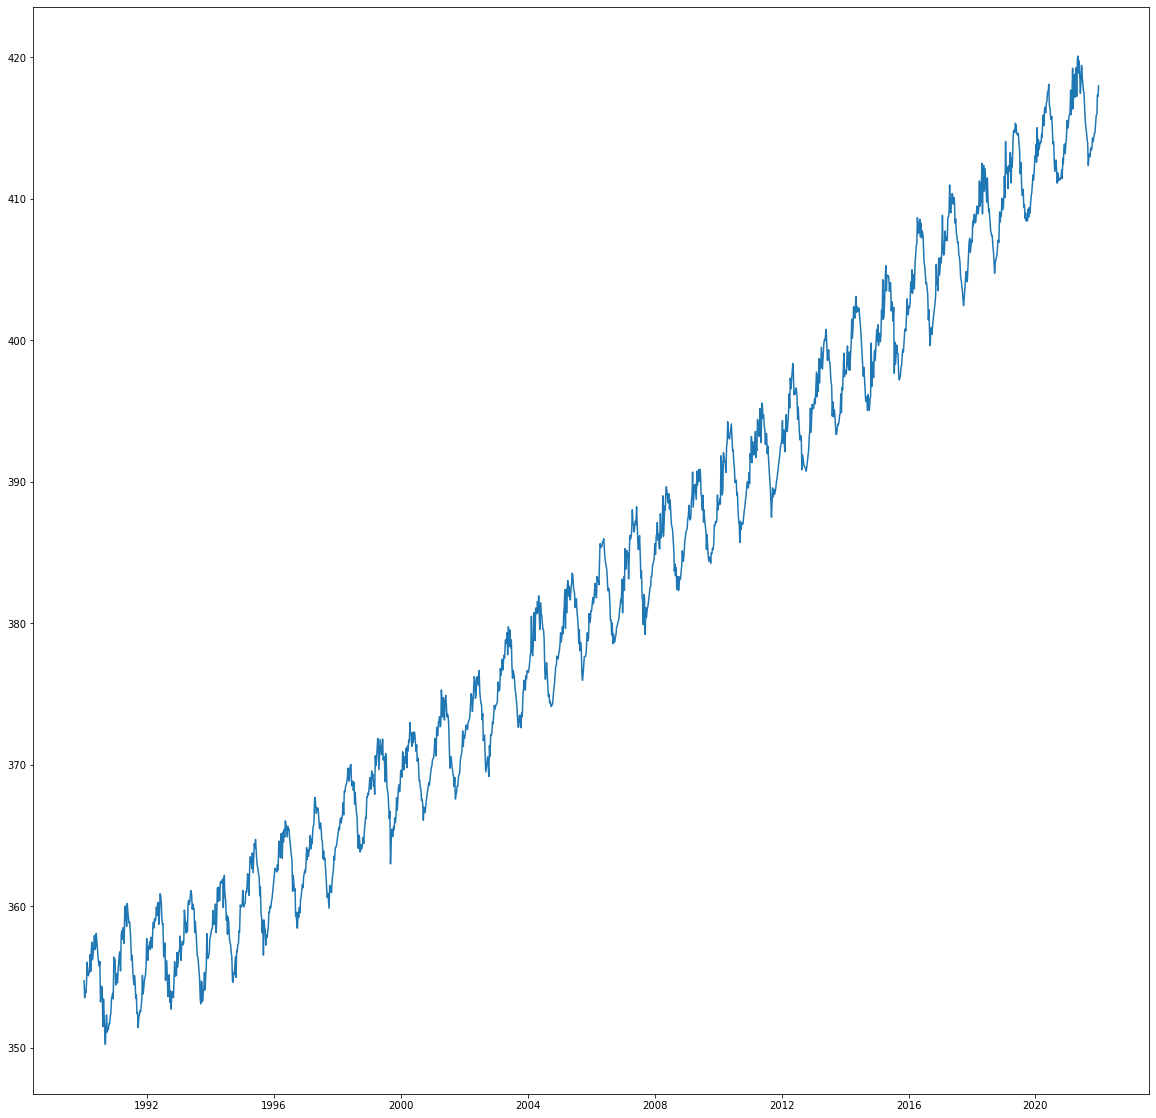

In [39]:
plt.figure(figsize=(20,20))
plt.plot(df)

In [40]:
dfstandarddeviation = df.rolling(365).std()

In [41]:
dfrollingmean = df.rolling(365).std()

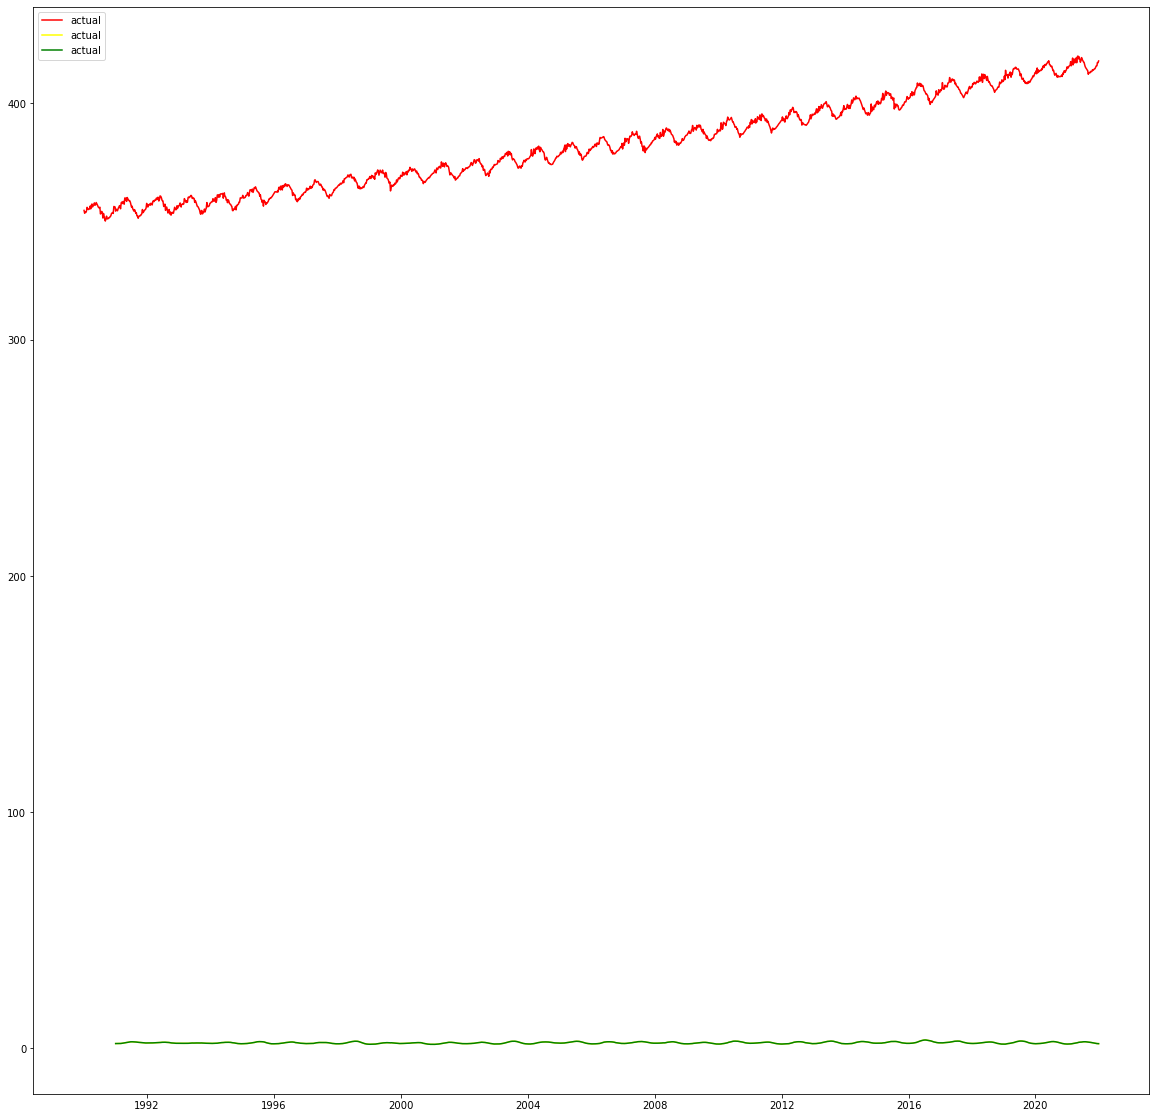

In [42]:
plt.figure(figsize=(20,20))
plt.plot(df,color='red',label='actual')
plt.plot(dfrollingmean,color='yellow',label='actual')
plt.plot(dfstandarddeviation,color='green',label='actual')
plt.legend()

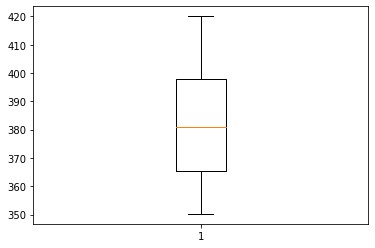

In [43]:
plt.boxplot(df)
plt.show()

In [44]:
groups=df.groupby(df.index.year)

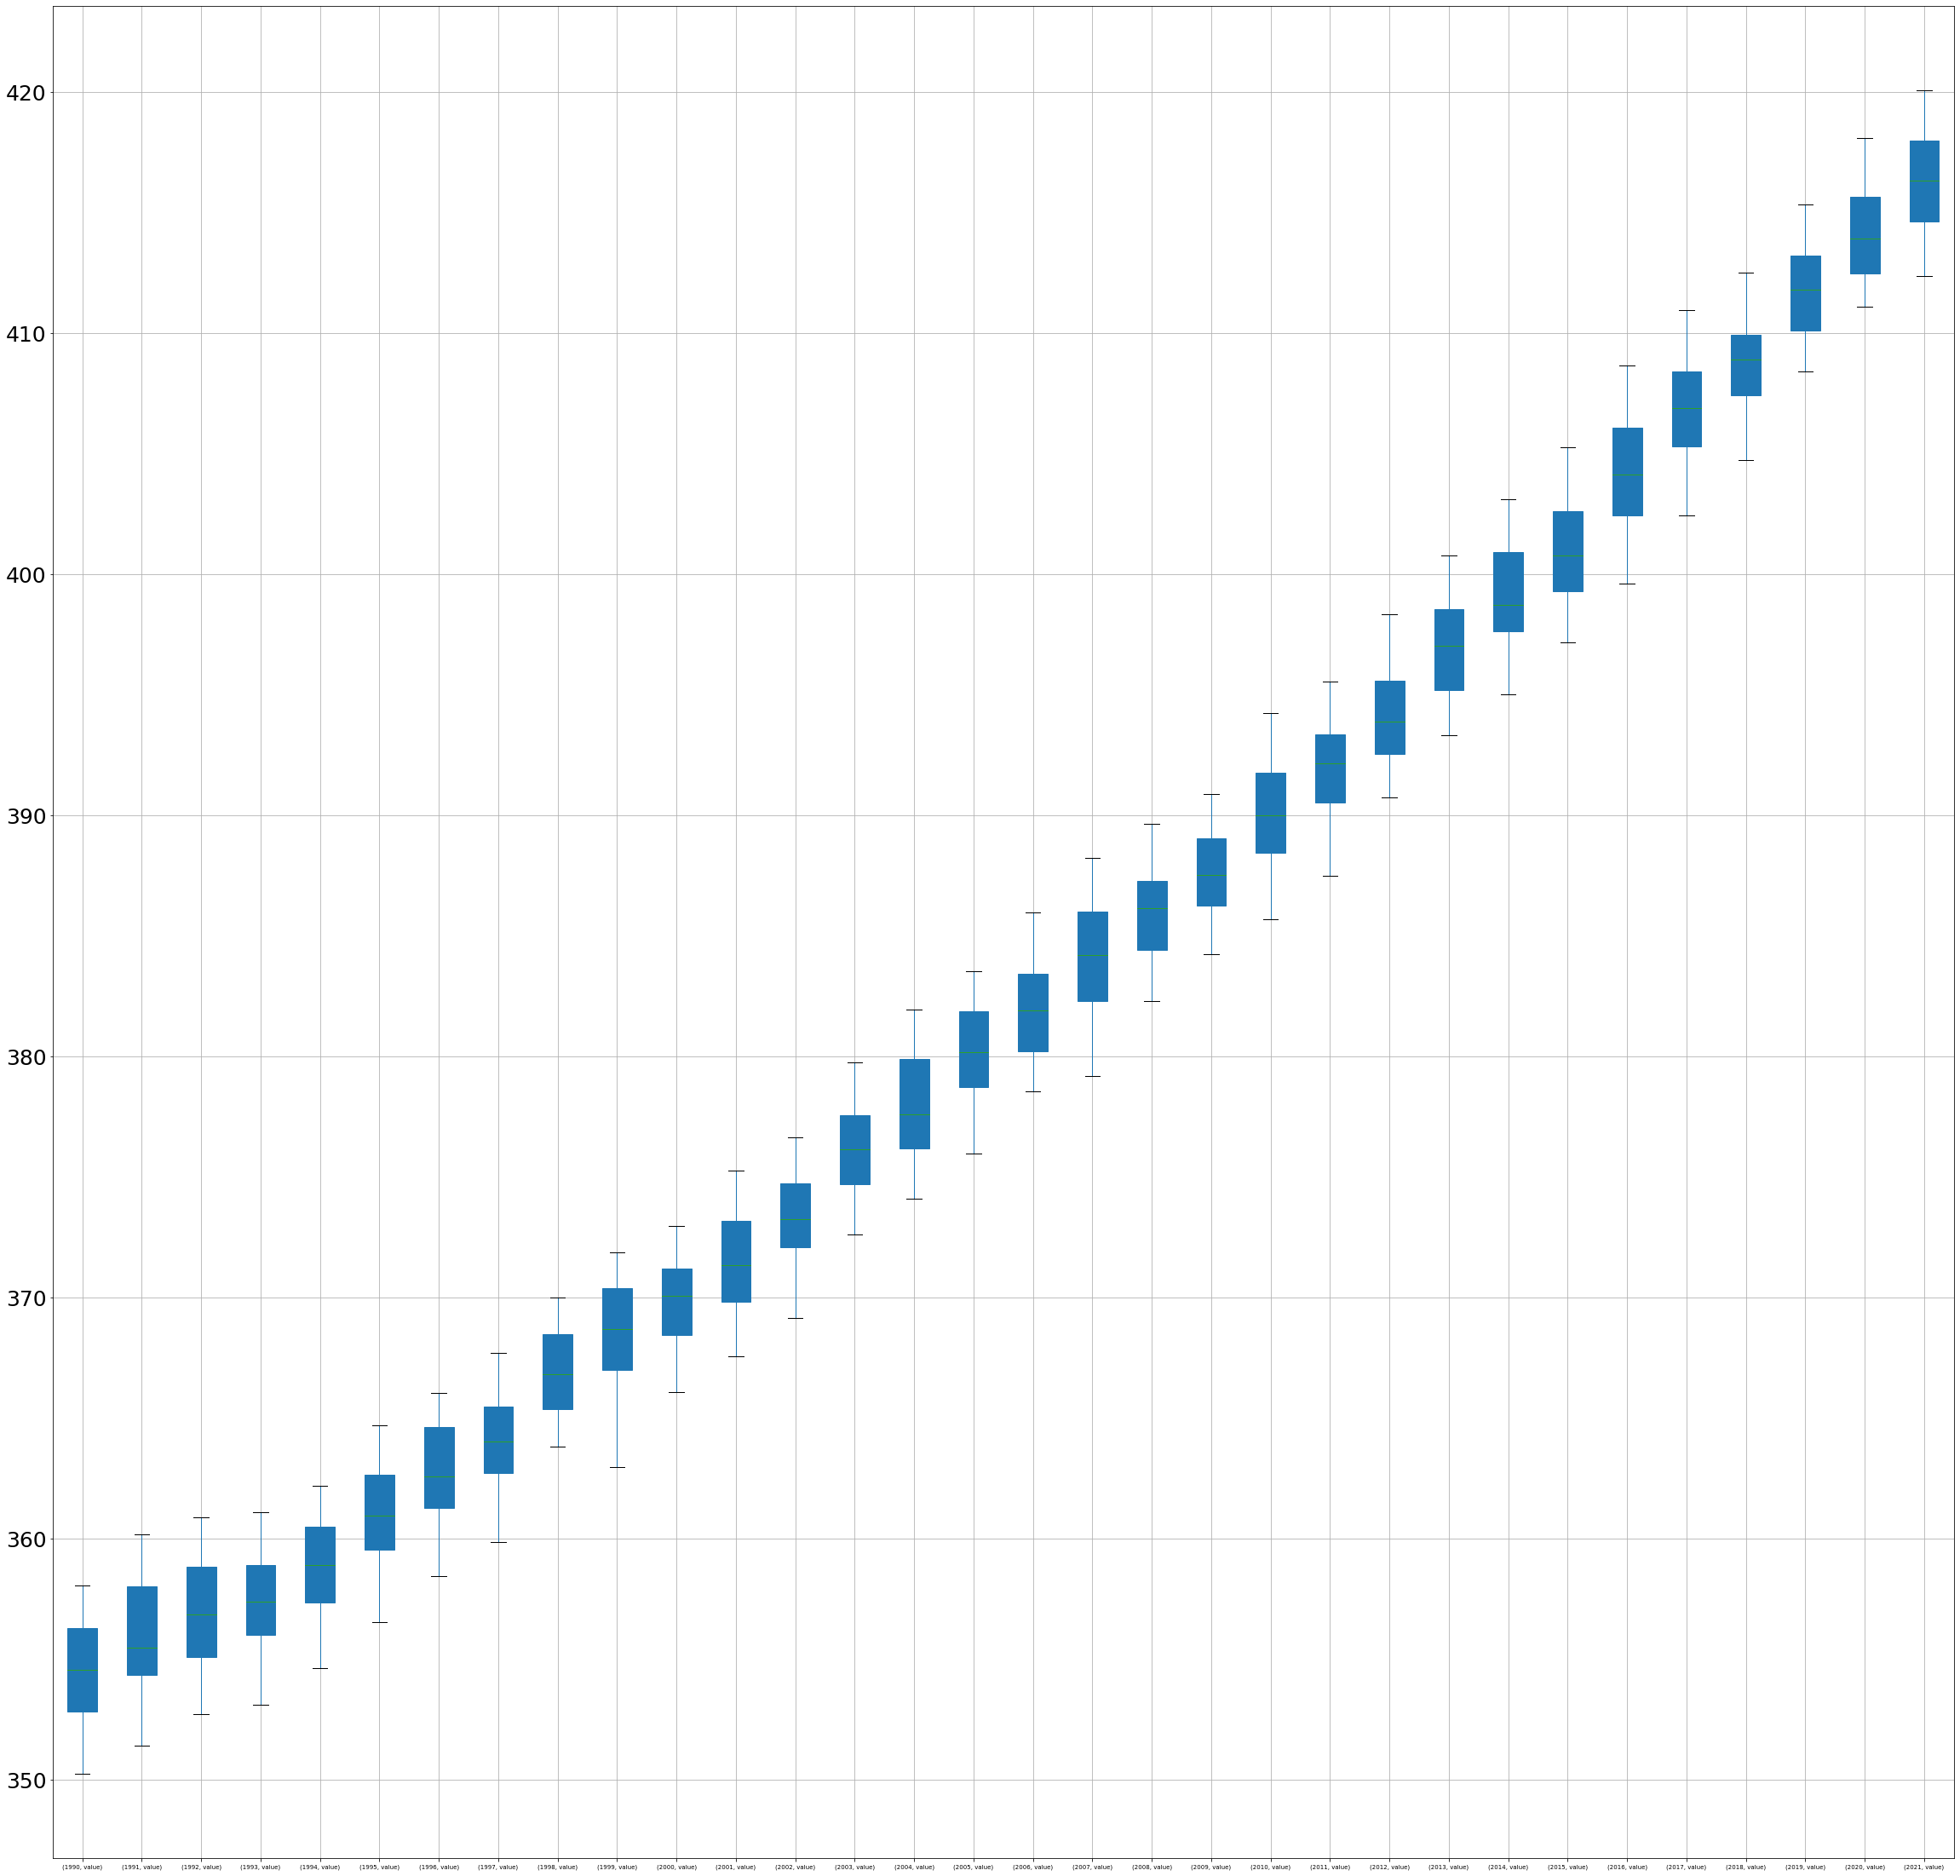

In [46]:
labels=range(1990,2022)
groups.boxplot(subplots=False,figsize=(40,40),patch_artist=True,labels=labels)
plt.gca().get_xaxis().set_visible(True)
plt.yticks(fontsize=25)
plt.xticks(fontsize=7)
# plt.xlabel=plt.xlabel[0]
plt.show()

<AxesSubplot:ylabel='Count'>

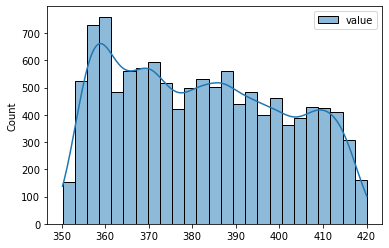

In [47]:
sns.histplot(data=df,kde=True)

C:\Users\python\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


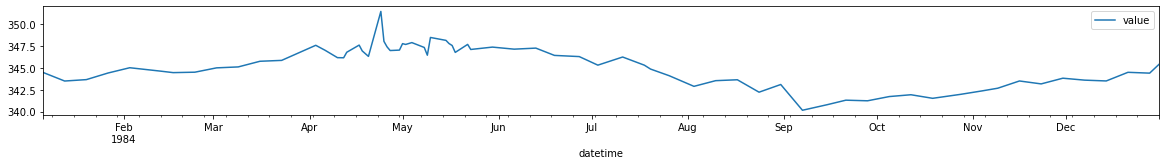

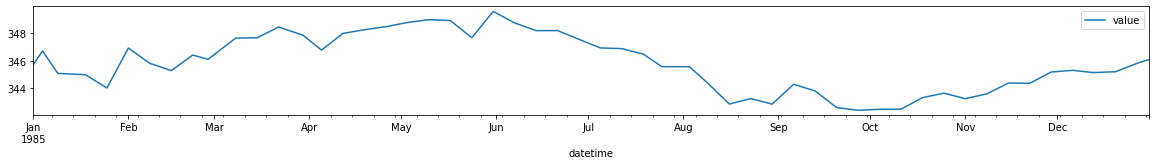

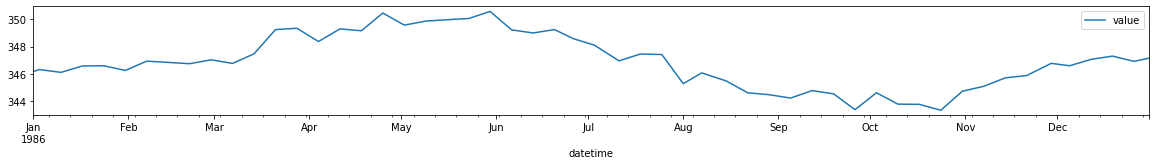

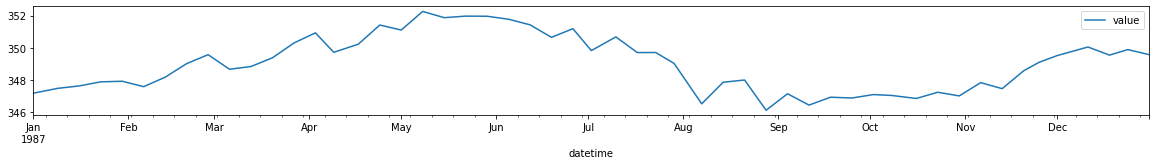

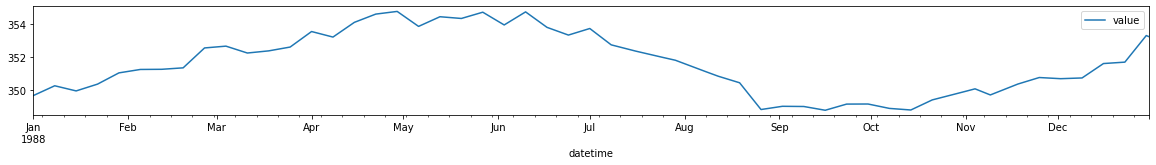

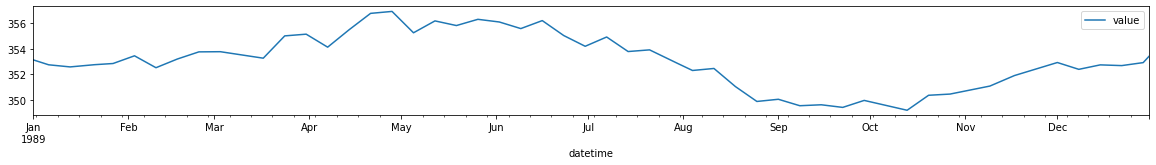

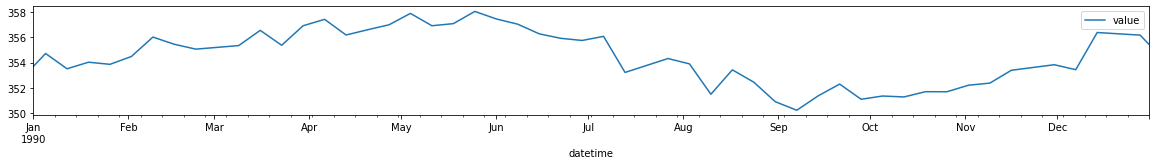

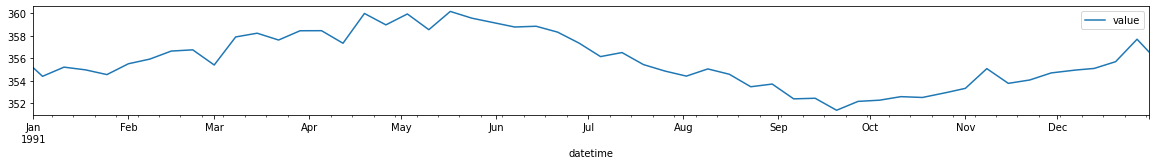

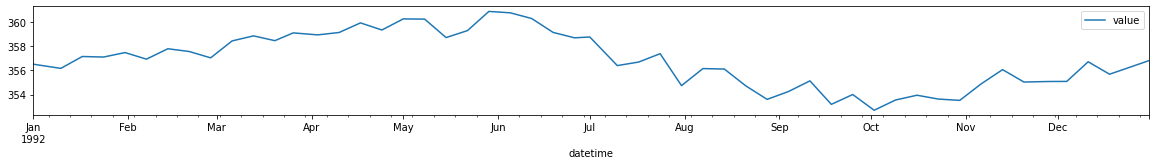

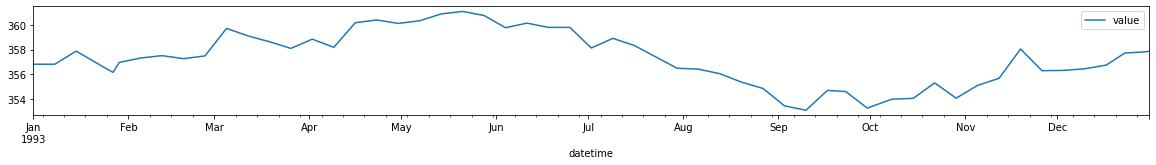

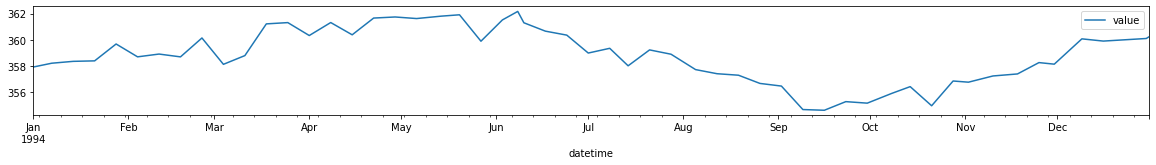

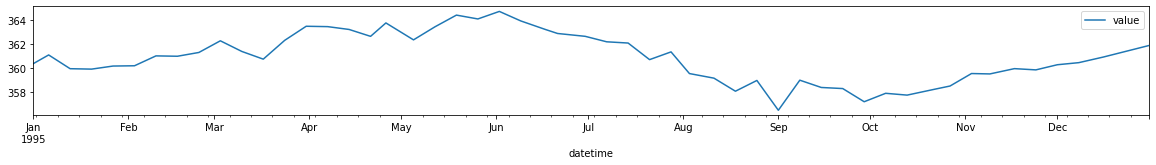

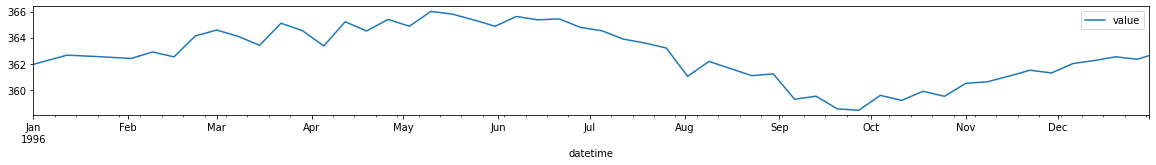

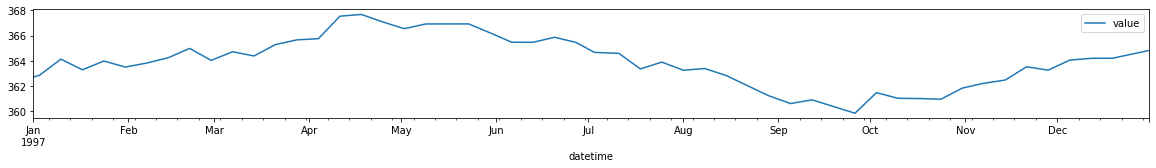

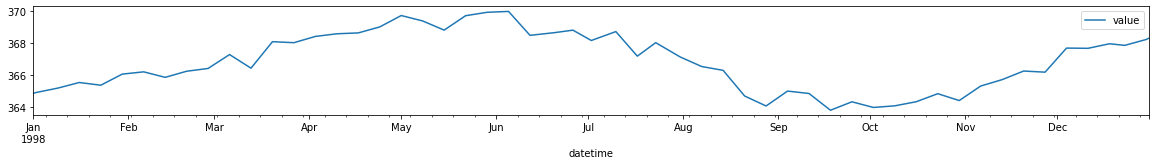

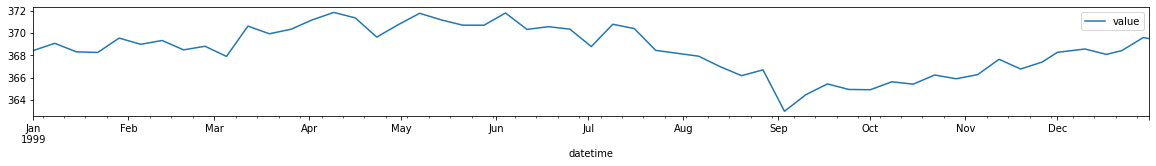

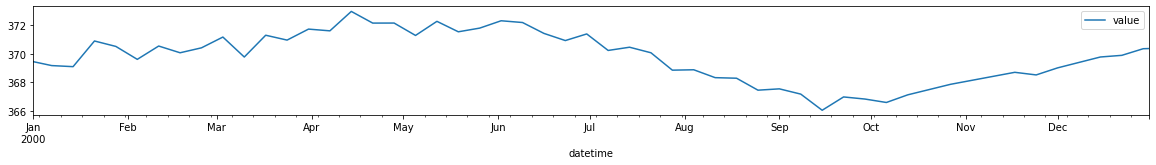

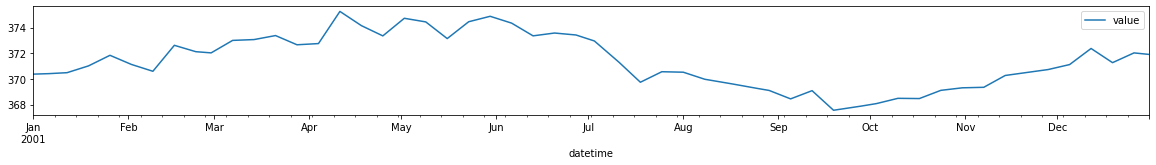

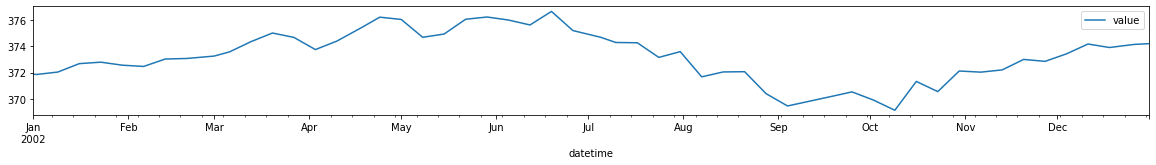

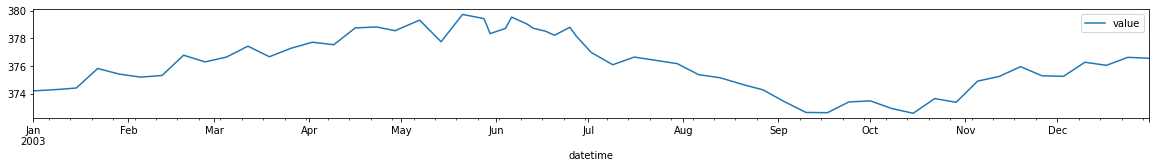

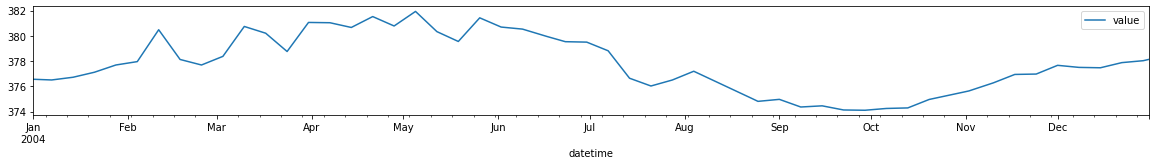

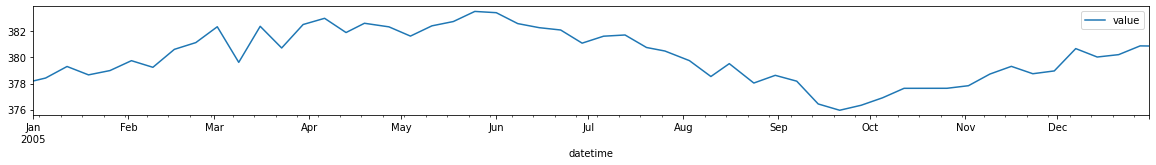

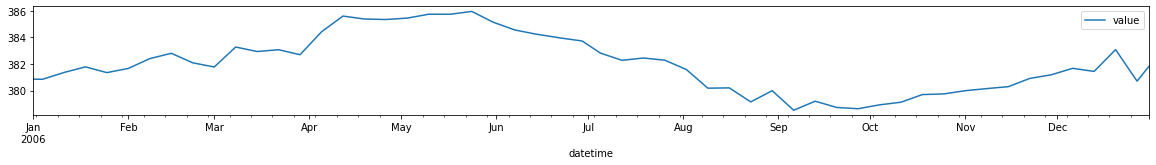

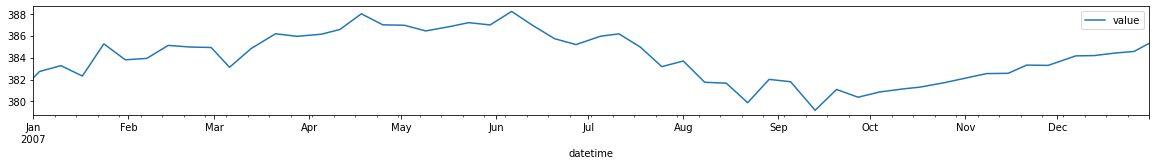

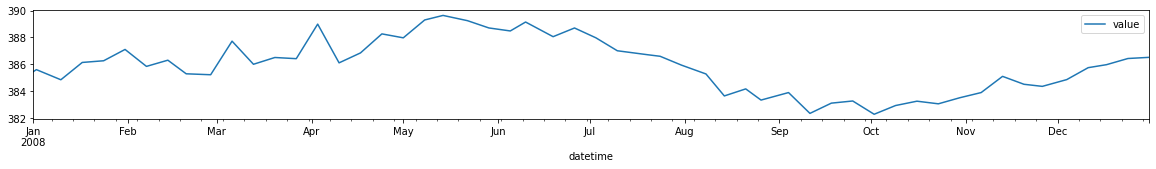

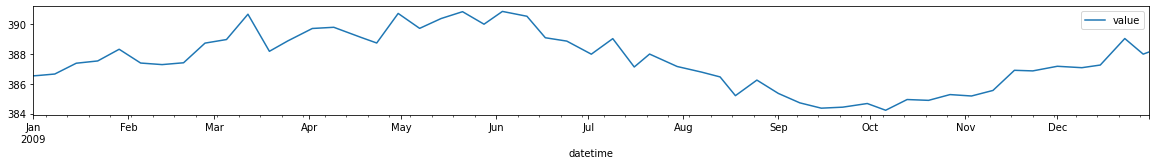

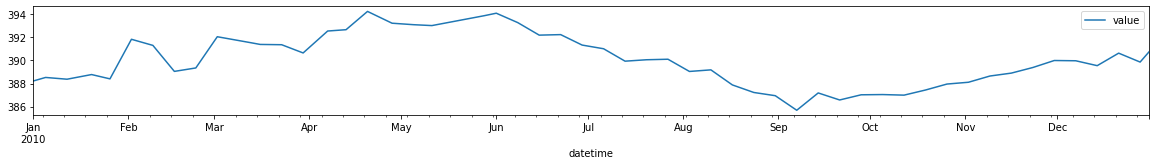

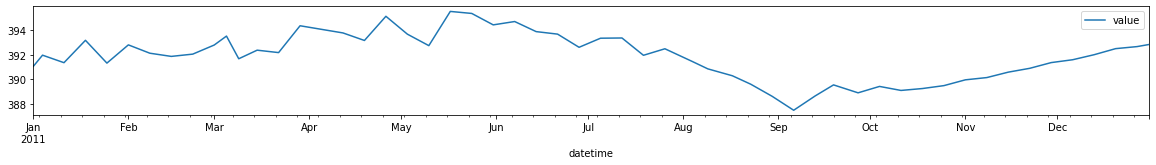

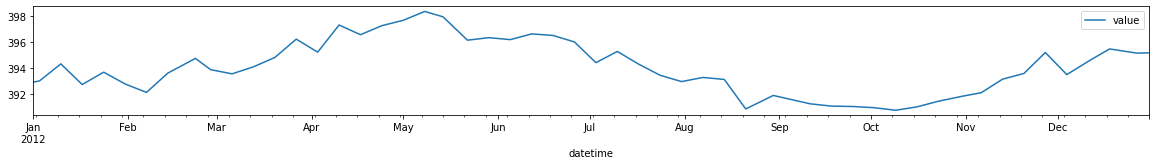

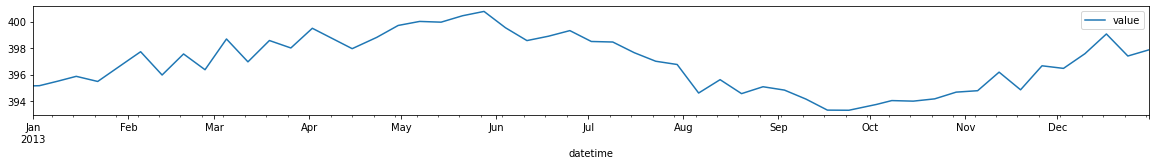

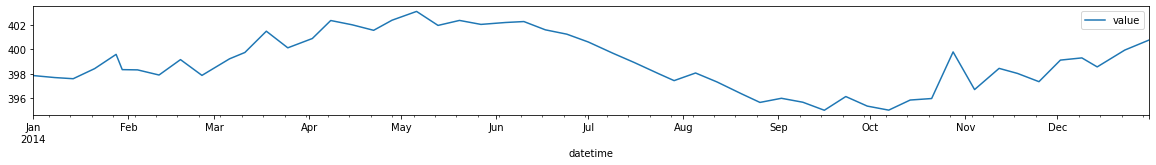

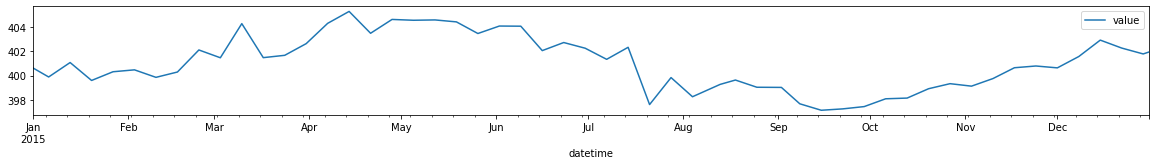

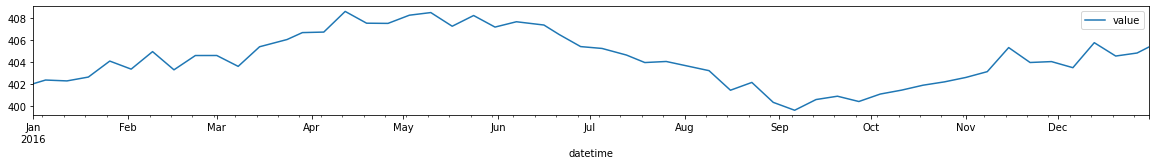

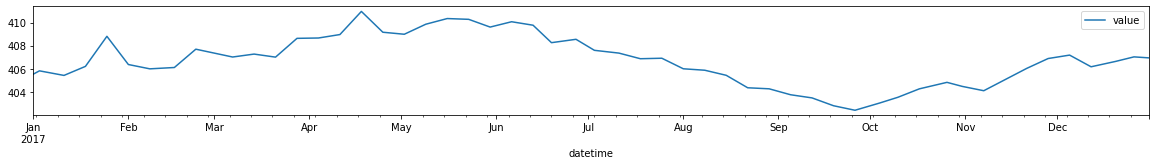

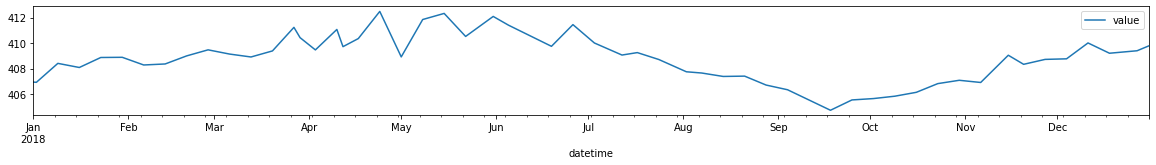

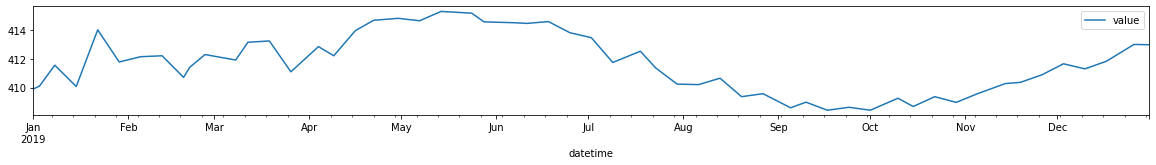

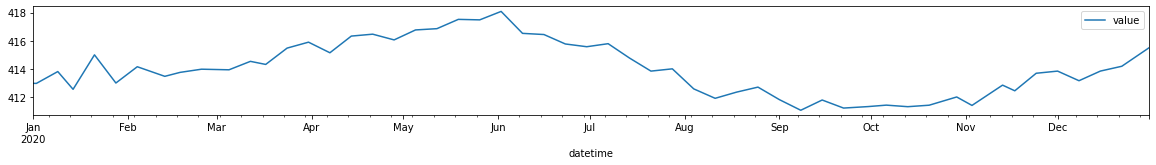

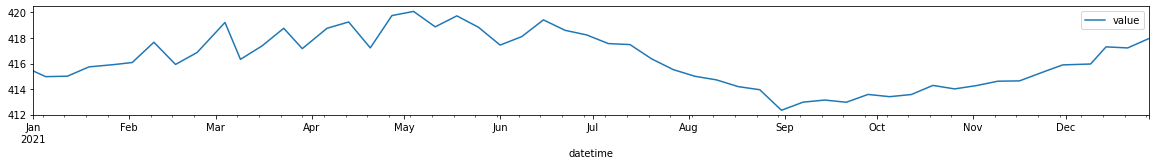

In [63]:
groups.plot(subplots=True,figsize=(20,2))
plt.show()

Text(0.5, 0, '1 year diff')

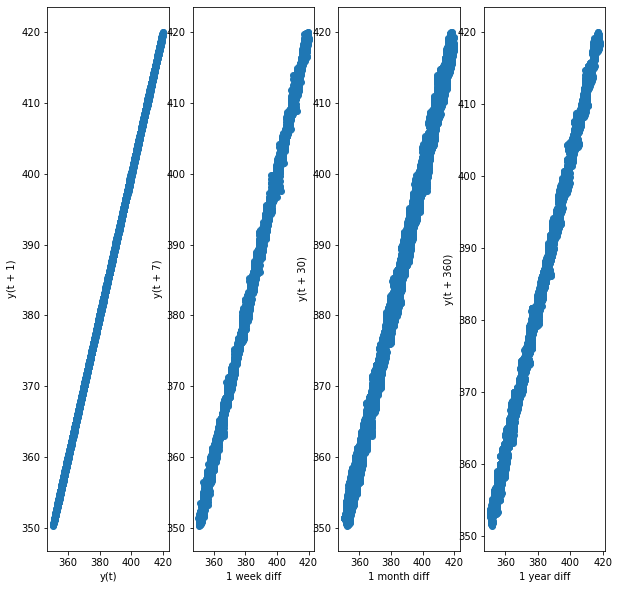

In [48]:
#lag plots
plt.figure(figsize=(10,10))

plt.subplot(1,4,1)
pd.plotting.lag_plot(df)
# plt.xlabel('1 day diff')

plt.subplot(1,4,2)
pd.plotting.lag_plot(df,lag=7)
plt.xlabel('1 week diff')

plt.subplot(1,4,3)
pd.plotting.lag_plot(df,lag=30)
plt.xlabel('1 month diff')

plt.subplot(1,4,4)
pd.plotting.lag_plot(df,lag=360)
plt.xlabel('1 year diff')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

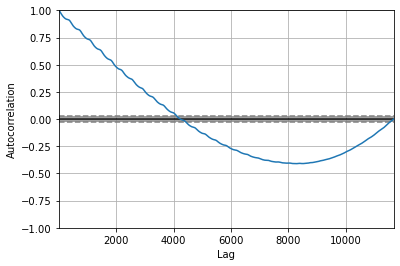

In [49]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

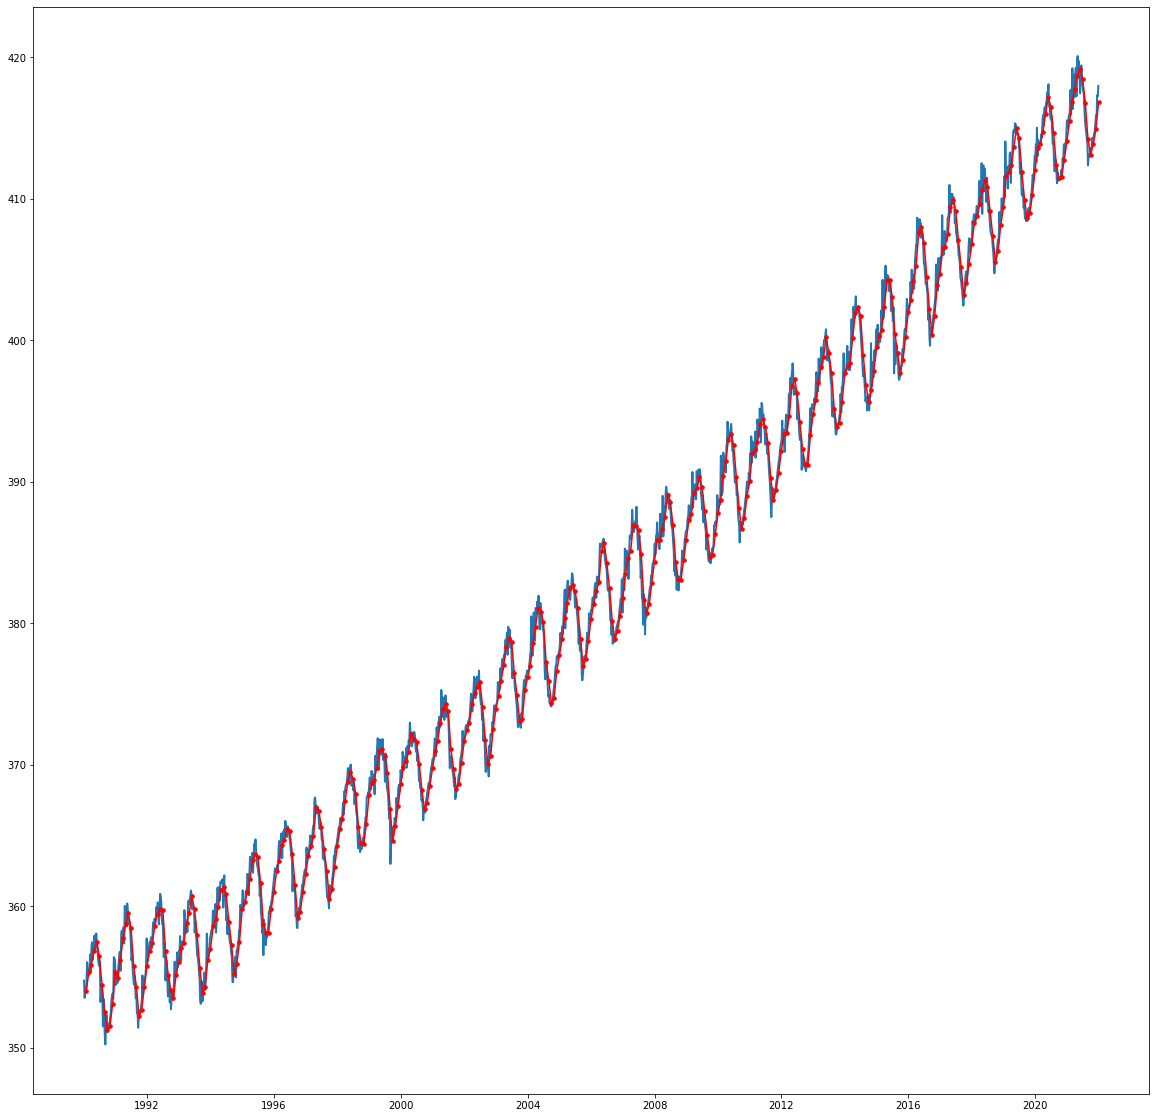

In [50]:
#downsampling to month
resample=df.resample('M') 
monthly_mean =resample.mean() 

plt.figure(figsize=(20,20))

plt.plot(df,linewidth=2)
plt.plot(monthly_mean,color='red',marker='.',markersize=7)

plt.show()

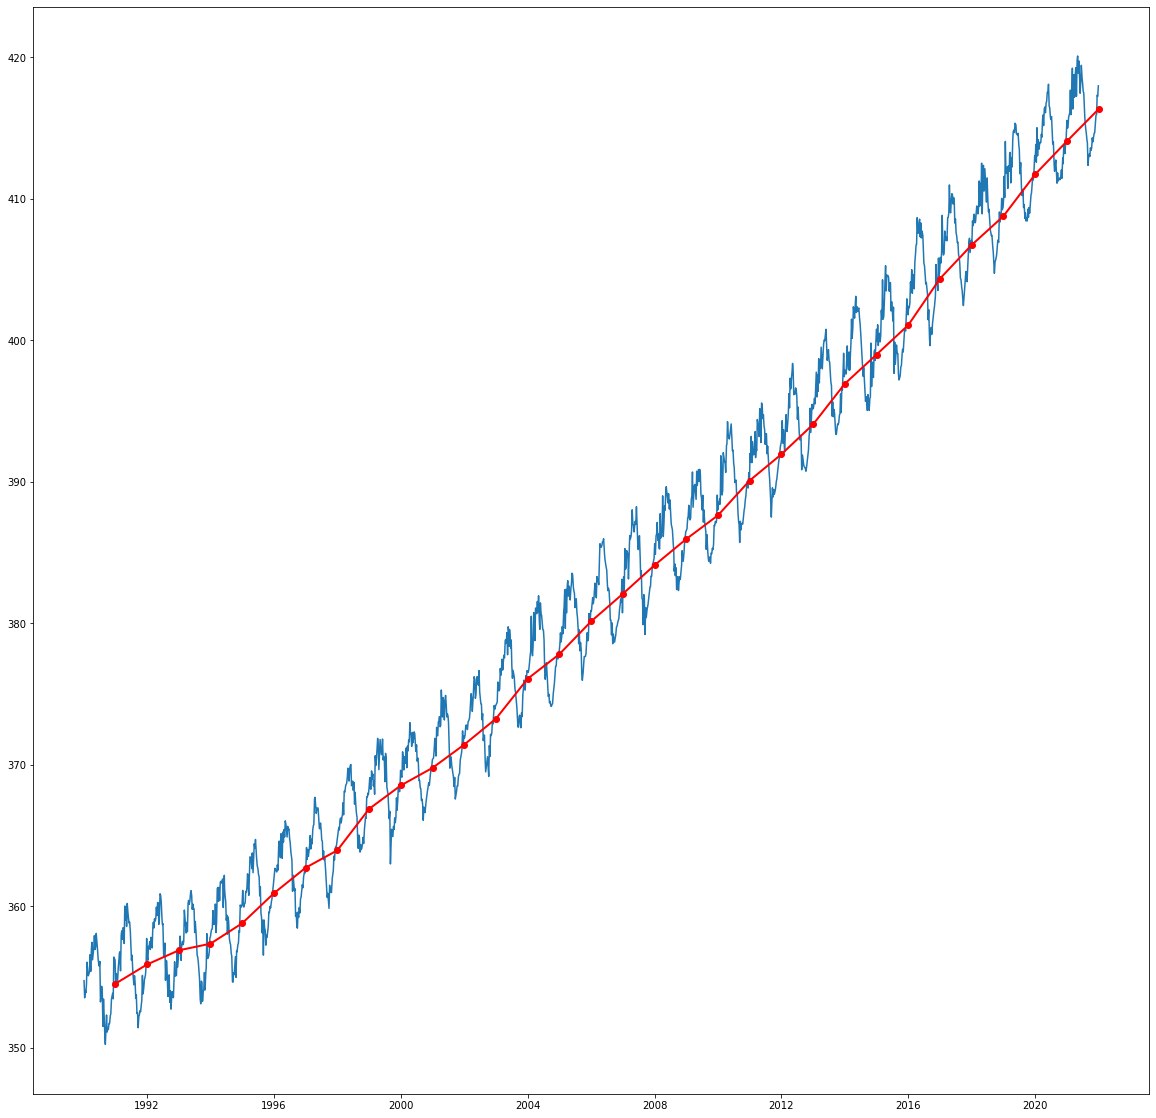

In [51]:
#Downsampling to year
resample=df.resample('A') 
annual_mean =resample.mean() 

plt.figure(figsize=(20,20))


plt.plot(df)
plt.plot(annual_mean,color='red',marker='.',linewidth=2,markersize=12)


plt.show()


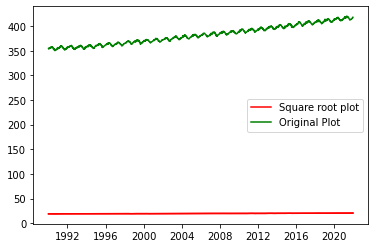

In [52]:

dfsqr = np.sqrt(df)

plt.plot(dfsqr,color="red",label="Square root plot")
plt.plot(df,color="green",label = "Original Plot")
plt.legend(loc="best")

plt.plot(dfsqr,color="red",label="Square root plot")

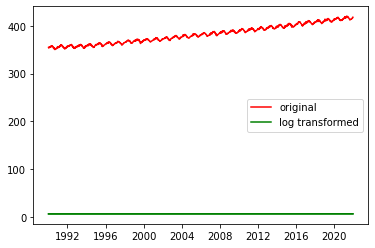

In [53]:
#log transform
dflog = np.log(df)

plt.plot(df,color="red",label="original")
plt.plot(dflog,color="green",label="log transformed")
plt.legend(loc="best")

plt.plot(dflog,color='green')

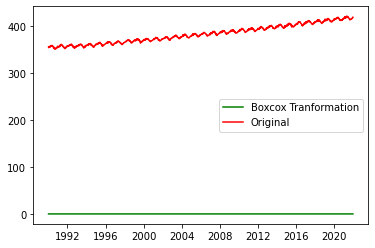

In [54]:
#boxcox
from scipy.stats import boxcox
databoxcox = boxcox(df['value'])

dfboxcox = df.copy()

dfboxcox['value'],lam=(boxcox(df['value']))

plt.plot(dfboxcox,color="green",label="Boxcox Tranformation")
plt.plot(df,color="red",label="Original")
plt.legend(loc="best")

<AxesSubplot:xlabel='datetime'>

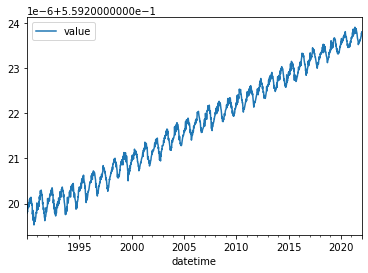

In [55]:
dfboxcox.plot()

(array([ 671., 1524., 1112., 1321., 1143., 1342., 1271., 1154., 1182.,
         961.]),
 array([0.55921953, 0.55921997, 0.5592204 , 0.55922084, 0.55922128,
        0.55922172, 0.55922216, 0.55922259, 0.55922303, 0.55922347,
        0.55922391]),
 <BarContainer object of 10 artists>)

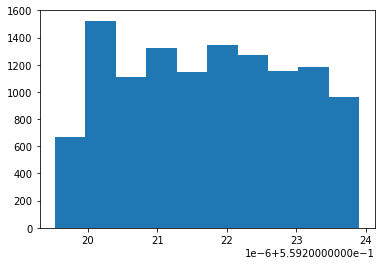

In [56]:
plt.hist(dfboxcox)
# plt.hist(df,color="red")

#  END OF REVIEW 1 #

### END od review 1 ###

In [3]:
df=pd.read_csv("preprocessed.csv",parse_dates=True,index_col=0)

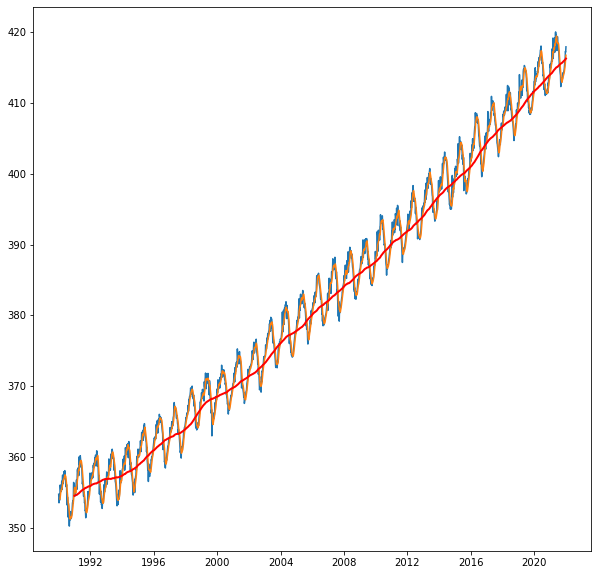

In [4]:
#moving average for data preparation
rolling30=df.rolling(30).mean()
rolling365=df.rolling(365).mean()
rolling7=df.rolling(7).mean()
plt.figure(figsize=(10,10))
plt.plot(df)
plt.plot(rolling30)
plt.plot(rolling365,linewidth=2,color='red')

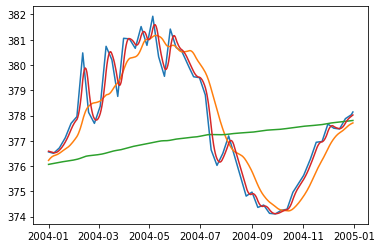

In [59]:
plt.plot(df.loc['2004'])
plt.plot(rolling30.loc['2004'])
plt.plot(rolling365.loc['2004'])
plt.plot(rolling7.loc['2004'])

In [60]:
#moving average for prediction
from sklearn.metrics import mean_absolute_percentage_error
window = 7
temp=df.copy()
temp['predictions']=temp.rolling(window).mean().shift()
temp.dropna(inplace=True)

Test MAPE: 0.001


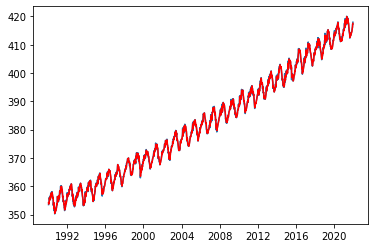

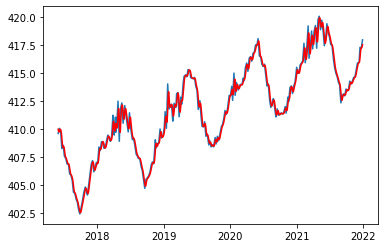

In [62]:
mape=mean_absolute_percentage_error(temp['value'], temp['predictions'])
print('Test MAPE: %.3f' % mape)
plt.plot(temp['value']) 
plt.plot(temp['predictions'], color='red') 
plt.show() 
plt.plot(temp['value'][10000:]) 
plt.plot(temp['predictions'][10000:], color='red') 
plt.show()

### white noise ###

In [63]:
df.describe()

,value
count,11681.000000
mean,382.166708
std,18.905923
min,350.221667
25%,365.396429
50%,381.054286
75%,397.881071
max,420.075000


In [64]:
#mean is not equal to zero
#standard deviation is not equal to 1

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

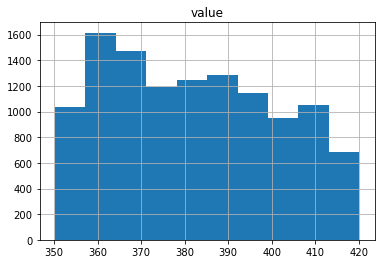

In [65]:
df.hist()

In [66]:
#the distribution is non-gaussian

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

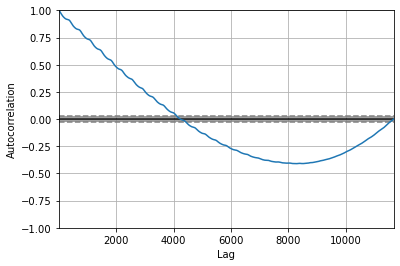

In [67]:
autocorrelation_plot(df)

In [83]:
#significant values present
#final inference: time-Series is not white-noise

### Random walk ###

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

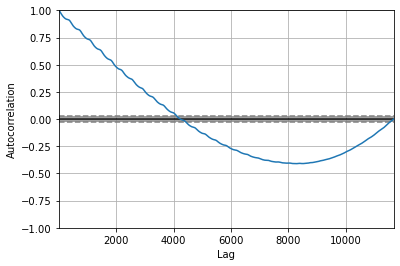

In [68]:
autocorrelation_plot(df)

In [69]:
#inference: Signifcant autocorrelation values for a lot of lag values

<AxesSubplot:xlabel='datetime'>

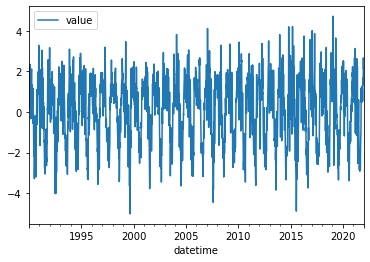

In [70]:
temp=df.diff(30)
temp.plot()

### trend and seasonality ###

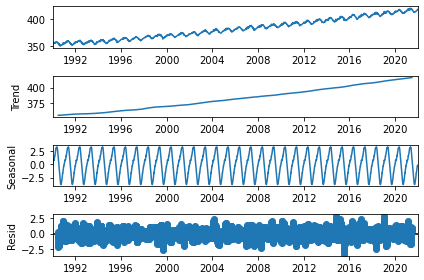

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(df, model='additive',period=365)
result.plot() 
plt.show()

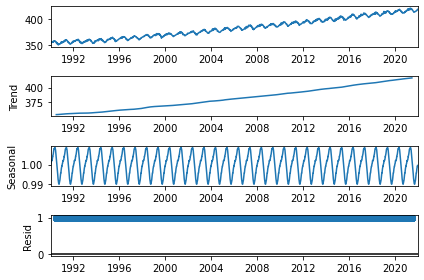

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(df, model='multiplicative', period=365)
result.plot() 
plt.show()

In [73]:
#data has additive seasonality
#data has upward trend

<AxesSubplot:xlabel='datetime'>

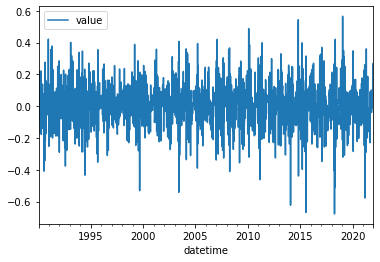

In [74]:
#detrending the time series
df_diff=df.diff().dropna()
df_diff.plot()

### stationaity ###

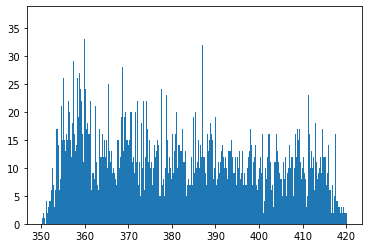

In [75]:
plt.hist(df,bins=1000)
plt.show()

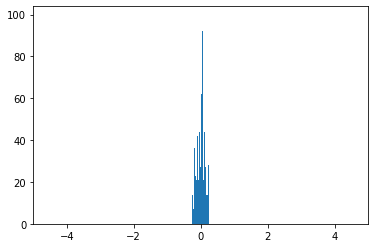

In [76]:
plt.hist(df_diff,bins=1000)
plt.xlim(-5,5)
plt.show()

In [77]:
length=df.shape[0]
segment1=df.iloc[:length//4,:]
segment2=df.iloc[length//4:2*length//4,:]
segment3=df.iloc[2*length//4:3*length//4,:]
segment4=df.iloc[3*length//4:,:]

In [78]:
pd.concat([segment1.describe(),segment2.describe(),segment3.describe(),segment4.describe()],axis=1)

,value,value,value,value
count,2920.000000,2920.000000,2920.000000,2921.000000
mean,358.874734,372.978073,389.077151,407.728119
std,3.778111,4.801232,5.173662,6.111803
min,350.221667,362.975000,378.537500,395.022500
25%,356.061643,369.136429,385.167589,402.554375
50%,358.772845,372.598214,388.834107,408.132500
75%,361.535804,376.589018,393.205179,412.721500
max,367.680000,383.522500,400.760000,420.075000


In [79]:
length=df_diff.shape[0]
segment1=df_diff.iloc[:length//4,:]
segment2=df_diff.iloc[length//4:2*length//4,:]
segment3=df_diff.iloc[2*length//4:3*length//4,:]
segment4=df_diff.iloc[3*length//4:,:]

In [80]:
pd.concat([segment1.describe(),segment2.describe(),segment3.describe(),segment4.describe()],axis=1)

,value,value,value,value
count,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.003507,0.005447,0.005802,0.006902
std,0.130751,0.123750,0.138353,0.151840
min,-0.433750,-0.541250,-0.462500,-0.677500
25%,-0.077381,-0.071071,-0.080938,-0.086429
50%,0.001429,0.007857,0.012500,0.012143
75%,0.082381,0.079167,0.073929,0.094732
max,0.421429,0.407500,0.488214,0.565714


In [81]:
from statsmodels.tsa.stattools import adfuller 
result = adfuller(df) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.861937
p-value: 0.800249
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [82]:
#the given data is not stationary as p value >0.05 

In [83]:
result = adfuller(df_diff) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.911215
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### completed unitl chapter 15 ###

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm 

In [4]:
df=pd.read_csv("preprocessed.csv",parse_dates=True,index_col=0)

<AxesSubplot:xlabel='datetime'>

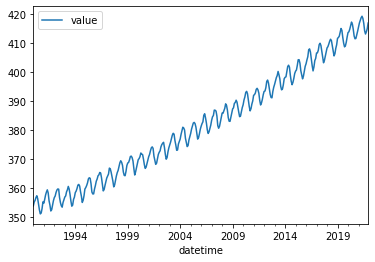

In [9]:
temp=df.resample('M').mean()
temp.plot()

<AxesSubplot:xlabel='datetime'>

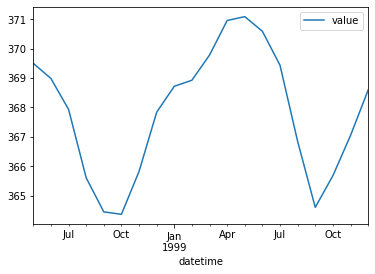

In [6]:
temp[100:120].plot()

In [7]:
from statsmodels.tsa.statespace.tools import diff  
diffdvds=diff(temp, k_diff=1, k_seasonal_diff=True, seasonal_periods=12)
diffdvds

,value
datetime,
1991-02-28 00:00:00+00:00,-0.022017
1991-03-31 00:00:00+00:00,0.943555
1991-04-30 00:00:00+00:00,0.061988
1991-05-31 00:00:00+00:00,0.116358
1991-06-30 00:00:00+00:00,-0.035168
...,...
2021-08-31 00:00:00+00:00,-0.310518
2021-09-30 00:00:00+00:00,-0.155308
2021-10-31 00:00:00+00:00,0.675168


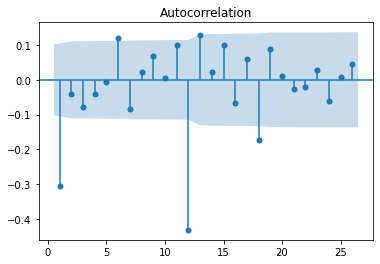

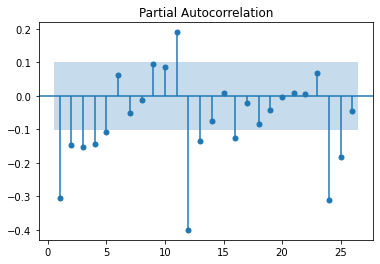

In [8]:
plot_acf(diffdvds,zero=False) 
plot_pacf(diffdvds,zero=False) 
plt.show()

In [10]:
#train testsplit
train=temp[:-24]
test=temp[-24:]

In [10]:
mod = sm.tsa.SARIMAX(train, order=(1,1,1),seasonal_order=(0,1,1,12)) 
res = mod.fit() 
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  360
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -196.034
Date:                            Mon, 09 Jan 2023   AIC                            400.068
Time:                                    06:22:09   BIC                            415.465
Sample:                                01-31-1990   HQIC                           406.199
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2346      0.106      2.206      0.027       0.026       0.443
ma.L1         -0.6663      0.079   

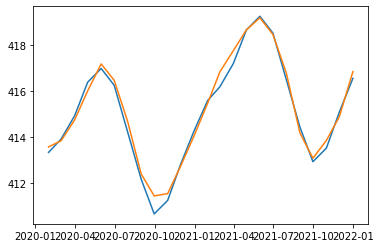

In [11]:
result=res.forecast(24)
plt.plot(result)
plt.plot(test)

In [15]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape

In [16]:
print(mse(result,test))

0.09294065693990405


In [17]:
print(mape(result,test))

0.0006005736894488746


In [20]:
mod = sm.tsa.SARIMAX(temp, order=(1,1,1),seasonal_order=(0,1,1,12)) 
res = mod.fit() 
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  384
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -204.523
Date:                            Tue, 10 Jan 2023   AIC                            417.045
Time:                                    19:53:02   BIC                            432.710
Sample:                                01-31-1990   HQIC                           423.267
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2424      0.102      2.386      0.017       0.043       0.441
ma.L1         -0.6757      0.075   

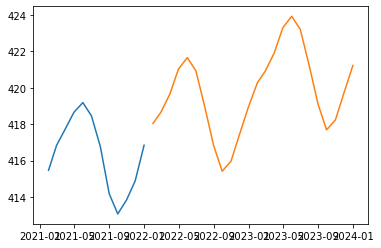

In [16]:
#forecasting
plt.plot(temp.tail(12))
plt.plot(res.forecast(24))

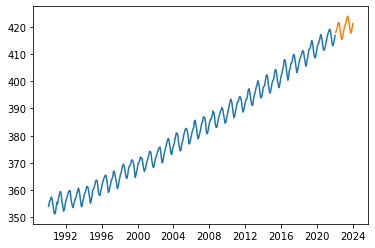

In [17]:
#forecasting
plt.plot(temp)
plt.plot(res.forecast(24))

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
hwmodel=ExponentialSmoothing(train,trend='add', seasonal='add', seasonal_periods=12).fit()

In [12]:
result=hwmodel.forecast(24)

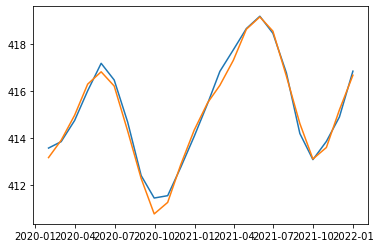

In [13]:
plt.plot(test)
plt.plot(result)

In [21]:
print(mse(result,test))

0.09294065693990405


In [23]:
print(mape(result,test))

0.0011640413761197133


In [22]:
hwmodel=ExponentialSmoothing(temp,trend='add', seasonal='add', seasonal_periods=12).fit()

In [23]:
result=hwmodel.forecast(24)

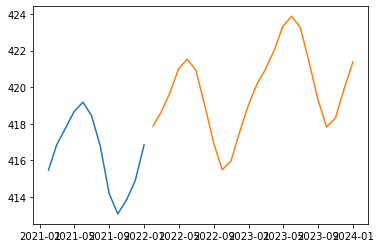

In [24]:
plt.plot(temp.tail(12))
plt.plot(result)

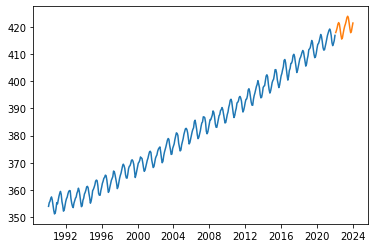

In [25]:
plt.plot(temp)
plt.plot(result)

In [28]:
model=auto_arima(train,d=1,start_q=0,start_p=0,max_p=1,max_q=2,D=1,start_P=0,start_Q=0,max_P=1,max_Q=1,seasonal=True,
                   trace=True,stepwise=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=619.079, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=507.584, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=586.461, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=544.794, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=487.708, Time=0.38 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=566.677, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=400.068, Time=0.77 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=401.895, Time=2.23 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.05

### END ###